Author: Sean Tulin
<br>
PHYS 2030

# <center><font color=#46769B>Lesson 4: Importance Sampling</font></center>

## <font color=#46769B>Motivation</font>

We have studied several examples using *inverse CDF sampling* to sample from a probability distribution. 
This requires that we are able to integrate the PDF to compute the CDF, which is then inverted to obtain the inverse CDF $C^{-1}$. 
While this was accomplished analytically in our examples, for a general PDF it may not be possible to perform either of these steps analytically.
In principle, one can use numerical integration and inversion algorithms to perform these tasks, but they may be numerically costly.

There is also another limitation: so far, we have only considered *univariate* PDFs, i.e., $P(x)$ is a function of a single variable $x$. There can also be *multivariate* probability distributions, e.g., $P(x,y)$, a PDF that depends on two variables $x$ and $y$ and you want to sample *both* $x$ and $y$.

We have seen some simple multivariate PDFs already. For instance, in Example 8, we computed the muon decay length $d$ by sampling two parameters, $t$ from $P_t(t)$ and $E$ from $P_E(E)$. This is a (trivial) multivariate PDF: 

$$P(t,E) = P_t(t) P_E(E) \, .$$

That is, the joint multivariate PDF factorizes into a product of univariate PDFs, which can be sampled from individually.
However, if a multivariate PDF cannot be factorized, we need another approach.

## <font color=#46769B>Basic idea</font>

Suppose we have a PDF $P(x)$ that we *want* to draw samples from, known as the __target distribution__. but it is too complicated to use inverse CDF sampling.  We can use another method, __importance sampling__. The main idea is: 

- Draw random samples for $x$ from a *different* PDF, labeled $Q(x)$, known as the __proposal distribution__:
$$(x_0, \, x_1, \, ..., \, x_{N-1}) \, .$$
You are free to choose $Q(x)$ to be anything you like and ideally $Q(x)$ should be easy to sample from. It also needs to satisfy a few properties (discussed below).

- Calculate __weights__
$$ w_i = \frac{P(x_i)}{Q(x_i)} $$
for each sample of $x$. The quantity $P(x)/Q(x)$ is known as the __likelihood ratio__. 

- We calculate averages *by weighting each sample $x_i$ by its likelihood ratio $w_i$*. For example, the mean value of $x$ is
$$\langle x \rangle_w = \frac{1}{N} \sum_{i=0}^{N-1} w_i \, x_i \, .$$
The mean value of some arbitrary function $f(x)$ is
$$\langle f(x) \rangle_w = \frac{1}{N} \sum_{i=0}^{N-1} w_i \, f(x_i) \, . \qquad (1)$$
We have generalized our notion of mean value now to be a *weighted* average. We attach an extra subscript $w$ to denote a weighted mean.

Clearly, if $P(x) = Q(x)$, then we get back the usual results for computing a mean. 

The key idea of importance sampling is that even though we are not sampling $x$ from $P(x)$ directly, by including the appropriate weights $w_i$ for each sample $x_i$, we can calculate any quantity as if we were.

## <font color=#46769B>Proof</font>

Suppose we have a PDF $P(x)$ and we want to calculate the (true) mean of a function $f(x)$. This is

$$\overline{f(x)}_P = \int_{-\infty}^{\infty} dx \, f(x) \, P(x)\, . $$

We have attached an extra subscript $P$ to denote that we are taking the mean *with respect to a certain PDF*, namely $P(x)$.

Next, we can insert $Q(x)/Q(x)$ under the integral:

$$\overline{f(x)}_P = \int_{-\infty}^{\infty} dx \, f(x) \, \frac{P(x)}{Q(x)} Q(x) = \int_{-\infty}^{\infty} dx \, g(x)\,  Q(x) = \overline{g(x)}_Q  \, . \qquad (2) $$

where $g(x) = f(x)P(x)/Q(x)$. 

Next, we turn to Monte Carlo sampling to compute $\overline{f(x)}_P$. According to Eq. (2), we can do a *different* Monte Carlo simulation, as follows:
- Draw $N$ random samples for $x$ from another PDF $Q(x)$.
- Calculate the mean value of $g(x)$ from our samples, which approaches $\overline{g(x)}_Q$ in the large $N$ limit:

$$\langle g(x) \rangle = \frac{1}{N} \sum_{i=0}^{N-1} g(x_i) \xrightarrow{N \to \infty} \overline{g(x)}_Q $$ 

This line can be rewritten in terms of $f(x)$ as follows. The left-hand side is the weighted sum in Eq. (1), while the right-hand side is in Eq. (2). So, we have

$$\langle f(x) \rangle_w = \frac{1}{N} \sum_{i=0}^{N-1} w_i\,  f(x_i) \xrightarrow{N \to \infty} \overline{f(x)}_P \, . \qquad (3)$$ 

If $P(x)$ is appropriately normalized to one, then we have

$$1 = \int_{-\infty}^{+\infty} dx \, P(x) = \int_{-\infty}^{+\infty} dx \, Q(x) \, \frac{P(x)}{Q(x)} \; .$$

Applying the same logic as above with $f(x) = 1$, we have the weights satisfy the equation

$$\frac{1}{N} \sum_{i=0}^{N-1} w_i \approx 1 \, ,$$

that is, in the large $N$ limit the sum of the weights should approach one.

## <font color=#46769B>Further comments</font>

How do you select the proposal distribution $Q(x)$? There are two essential rules:
- $Q(x)$ must itself be a valid PDF, i.e., normalized and non-negative.
- $Q(x)$ must be nonzero for the entire range where $P(x)$ is nonzero. Otherwise, the step where we insert $Q(x)/Q(x)$ is ill-defined where $Q(x)$ is zero.

In practice, nothing "blows up" if you do have $Q(x)$ go to zero where it should not. 
You are simply omitting some values of $x$ that should be there, and you will get the wrong results. (Note the converse need not be true. It is fine if $P(x)$ is zero even though $Q(x)$ is not. Such points $x_i$ will not contribute to any sums since their weights $w_i = P(x_i)/Q(x_i)$ will be zero.)

Then, there are two *suggested* rules:
- $Q(x)$ should not go to zero faster than $P(x)$ as, e.g., $x \to \pm \infty$.
- $Q(x)$ should not be small in the region where $P(x)$ is large.

Effectively, you are infrequently sampling points $x_i$ from the proposal distribution that have large weights $w_i = P(x_i)/Q(x_i)$. Your results will be noisy (or worse) if such points are only sampled infrequently or not at all. In practice, this can be "brute forced" by just increasing $N$, but it is a poor use of computing resources.

## <font color=#46769B>Weights</font>

Previously, we used `np.mean` and `np.std` to calculate the mean and standard deviations of our samples. Now, the situation is different since we must calculate *weighted* sums.

Here we will drop the subscript $w$ for a weighted mean. We will just remember that for importance sampling the we must always consider weighted means to calculate quantities with respect to our proposal distribution $P(x)$.

The mean is

$$\langle x \rangle = \frac{1}{N} \sum_{i=0}^{N-1} w_i x_i \, .$$

The variance is

$$\Delta x^2 = \frac{1}{N} \sum_{i=0}^{N-1} w_i \left(x_i - \langle x \rangle\right)^2 \, .$$

As before, one can show that $\Delta x^2 = \langle x^2 \rangle - \langle x \rangle^2$, so we must calculate the *mean of the square of $x$*, which is

$$\langle x^2 \rangle = \frac{1}{N} \sum_{i=0}^{N-1} w_i x_i^2 \, .$$

Lastly, the standard deviation is the square root of the variance, $\Delta x = \sqrt{\Delta x^2}$.

Let's write a code to calculate the mean and standard deviation with weights.

Note the code below takes in the weights as a keyword. If no weights are entered, it returns the usual mean and standard deviation.


In [1]:
def mean(x,weights=None):
    
    if weights is not None:
        return np.mean(weights*x)
    else:
        return np.mean(x)
    
def std(x,weights=None):
    
    if weights is not None:
        return np.sqrt( np.mean(weights*x**2) - np.mean(weights*x)**2 )
    else:
        return np.std(x)

## <font color=#46769B>Example: Importance sampling with a good proposal distribution</font>

Consider a simple example:

$${\rm target \; distribution:} \qquad P(x) = \mathcal{N}(1,1)$$

$${\rm proposal \; distribution:} \qquad Q(x) = \mathcal{N}(1.5,2)$$

Recall, $\mathcal{N}(\mu,\sigma)$ is our shorthand notation for a normal distribution centered at $\mu$ with width $\sigma$.

We are choosing target and proposal distributions with different means and standard deviations.

Here is a code that will implement these steps:
- Sample points $x_i$ from $Q(x)$
- Compute the weights $w_i$
- Compute weighted and unweighted means and standard deviations
- Plot histograms to see our results. Note `plt.hist` has a keyword `weights` that will allow us to attach weights to each value in the sample.

The takeaway from below is that including the weights reproduces what we expect if we had sampled from $P$ directly. Not including weights just gives results from sampling from $Q$, which is what we did.

Try changing $\mu$ and $\sigma$ for the proposal distribution and see what happens. (Even a good proposal distribution can turn bad!)


No weights: returns mean and standard deviations for Q
Mean and standard deviation are 1.4962505195145501 and 1.9953351118259957


With weights: returns mean and standard deviations for P
Mean and standard deviation are 1.0010351688356256 and 1.0010154153032367


Mean value of the weights should be close to 1: 1.0009681530363335


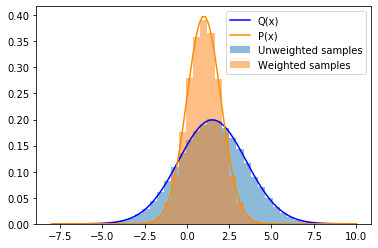

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define PDFs

# P(x)
mu_P, sigma_P = 1, 1
def P(x):
    return 1/np.sqrt(2*np.pi*sigma_P**2) * np.exp(-0.5*(x-mu_P)**2/sigma_P**2)

# Q(x)
mu_Q, sigma_Q = 1.5, 2
def Q(x):
    return 1/np.sqrt(2*np.pi*sigma_Q**2) * np.exp(-0.5*(x-mu_Q)**2/sigma_Q**2)

# Sample from Q(x)
num = 10**5
x_samples = np.random.normal(mu_Q,sigma_Q,num)

# Calculate weights
w = P(x_samples)/Q(x_samples)

# Compute mean with no weights
print('No weights: returns mean and standard deviations for Q')
print('Mean and standard deviation are', mean(x_samples), 'and', std(x_samples) )

print('\n') # line break

# Compute mean with weights
print('With weights: returns mean and standard deviations for P')
print('Mean and standard deviation are', mean(x_samples,weights=w), 'and', std(x_samples,weights=w) )

print('\n') # line break

# Check that the weights are normalized to 1
print('Mean value of the weights should be close to 1:', np.mean(w))


# Histograms

# Unweighted histogram (histogram for Q)
plt.hist(x_samples,bins=40,alpha=0.5,density=True,label='Unweighted samples')

# Weighted histogram (histogram for P)
plt.hist(x_samples,bins=40,alpha=0.5,weights=w,density=True,label='Weighted samples')

# Plots
x = np.linspace(-8,10,num=100)
plt.plot(x,Q(x),label='Q(x)',color='blue')
plt.plot(x,P(x),label='P(x)',color='darkorange')

plt.legend()
plt.show()

## <font color=#46769B>Example: Importance sampling with bad proposal distribution</font>

Consider the same target distribution $P(x) = \mathcal{N}(1,1)$, but a different proposal distribution $Q(x)$:
$${\rm proposal \; distribution:} \qquad Q(x) 
=  \left\{ \begin{array}{cc} \frac{1}{2} & {\rm for} \; 0 \le x \le 2 \\ 0 & {\rm otherwise} \end{array} \right.\, .$$
That is, $Q(x)$ is a uniform distribution over the interval $[0,2]$. This is a bad choice since $Q(x)$ goes to zero outside this interval while $P(x)$ does not. Let's see what happens.

Some take aways:
- Values of $x$ where $Q(x) = 0$ do not get sampled, so it is impossible to reproduce the true PDF there.
- The sum of the weights is no longer approximately $1$.
- The values of the mean and standard deviation no longer approximate their true values.

Mean and standard deviation are 0.6829190553088322 and 0.6442580227667493
Mean value of the weights should be close to 1: 0.682860582587146


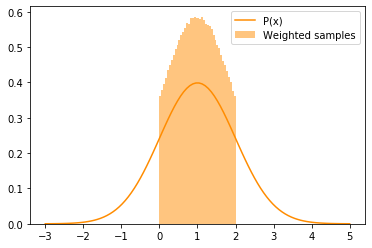

In [3]:
# Define PDFs

# P(x)
mu_P, sigma_P = 1, 1
def P(x):
    return 1/np.sqrt(2*np.pi*sigma_P**2) * np.exp(-0.5*(x-mu_P)**2/sigma_P**2)

# Q(x)
def Q(x):
    return np.where( (x >= 0) & (x <= 2), 0.5, 0)
    
# Sample from Q(x)
num = 10**6
x_samples = 2*np.random.rand(num)

# Calculate weights
w = P(x_samples)/Q(x_samples)

# Compute mean with weights
print('Mean and standard deviation are', mean(x_samples,weights=w), 'and', std(x_samples,weights=w) )
print('Mean value of the weights should be close to 1:', np.mean(w))

# Weighted histogram (histogram for P)
plt.hist(x_samples,bins=40,alpha=0.5,weights=w,density=True,label='Weighted samples',color='darkorange')

# Plots
x = np.linspace(-3,5,num=100)
plt.plot(x,P(x),label='P(x)',color='darkorange')

plt.legend()
plt.show()

## <font color=#46769B>Example: One-sided Gaussian</font>

Suppose we want to draw samples from the following PDF
$$P(x) = \left\{ \begin{array}{cc} \sqrt{\frac{2}{\pi}} \, e^{- \frac{x^2}{2} } & {\rm for} \; x \ge 0 \\
0 & {\rm otherwise} \end{array} \right. \, ,$$
which is half of a Gaussian with $\mu=0$ and $\sigma=1$.
One method to solve this problem is just to sample from a full Gaussian $\mathcal{N}(0,1)$ and take the absolute value for each $x$ sample. 

Here we will use importance sampling, using an exponential proposal distribution
$$Q(x) = \left\{ \begin{array}{cc} a \, e^{- ax } & {\rm for} \; x \ge 0 \\
0 & {\rm otherwise} \end{array} \right. \, ,$$
where $a$ is a constant that we are free to choose ourselves. Below I set $a=1$, but try choosing, e.g., $a=0.01$ or $a=100$, to see what happens.


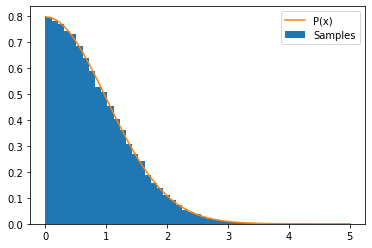

In [4]:
num = 10**5
a = 1

def P(x):
    return np.sqrt(2/np.pi)*np.exp(-0.5*x**2)

def Q(x):
    return a*np.exp(-a*x)

def sample_x_from_Q(num):
    r = np.random.rand(num)
    x = -1/a * np.log(1-r)
    return x

x_samples = sample_x_from_Q(num)
w = P(x_samples)/Q(x_samples)

# define bins explicitly
bins = np.linspace(0,5)

plt.hist(x_samples,weights=w,density=True,bins=bins,label='Samples')

x = np.linspace(0,5)
plt.plot(x,P(x),label='P(x)')

plt.legend()
plt.show()

